# Importing all Carrefour products

The goal is to adapt the code from scrapping Carrefour promotions to scrap Carrefour products from https://www.carrefour.fr/r
(See Web_scrapping_products file)

## Importing libraries

In [1]:
import requests as r
import json
import pandas as pd
from bs4 import BeautifulSoup
import os
import math
import time
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: extract data for one product page
### Defining the url to scrap with a GET method 

In [2]:
url='https://www.carrefour.fr/r?noRedirect=0&page=3'

### Defining the headers 

In [3]:
headers="""accept: application/json, text/plain, */*
accept-encoding: gzip, deflate, br
accept-language: fr-FR,fr;q=0.9,en-US;q=0.8,en;q=0.7
cache-control: no-cache
cookie: TCPID=119551614271772534656; _ga=GA1.2.1334375845.1556892869; cookieIDCrfOne=V12019531614280.2021166067845266; TC_OPTOUT=0@@@@@@ALL; already_visitedOne=1; visid_incap_1982952=0RjOMFJXRuKKO5znr4FgKeRMzFwAAAAAQUIPAAAAAAD6n2mvQU/sqwDmJkARHJBk; tc_cj_v2=m_iZZZ%22**%22%27%20ZZZKOOPRSLRPQNRRZZZ%5D777_rn_lh%5BfyfcheZZZ222H.*-/%24-%7B+%7B-%24.H%7D*%28ZZZKOOQLKRRRQLLMZZZ%5D777m_iZZZ%22**%22%27%20ZZZKOQRKMKMSQNRKZZZ%5D; datadome=MV~uTOOCnVIzfg.ULn2qjQwiYrYCKiCPqVlIXhkojIZNBB1zJzAjb_LCHT2CCYufdPeKF5Omu7~Z9jwshB52Hgn-fgLks.1wkrj4LccckQ; _cs_c=0; _cs_id=9566bfd8-1a78-a240-f0bb-e8015b3551ba.1556892869.3.1578131399.1578131399.1.1591056869072; visid_incap_441619=vrnUei+7RLiL2Xr3UUmTzfgij14AAAAAQUIPAAAAAABOtZUZlXTnCzjXe1PMdHUQ; visid_incap_1722501=z8YspOTjRLmNxY1jMdqc2voij14AAAAAQUIPAAAAAAAz5k9o0TPe5INp8+VLBGMZ; FRONTONE_USER=1589030911; FRONTONE_SESSID=b63750e3dfbafa4034d6cf3e8d2d558c; FRONTONE_SESSION_ID=e63380316c097c37050207ec718741fff9259edc; nlbi_441619=hPsnDNGFBgcuMoocJv8P3AAAAADvRtLIitBw0DCDaulsolSv; incap_ses_766_441619=uaSbTpo7UFIUnMdpFmKhCgjpkl4AAAAAymXlkWgd7EESAR9MmUd7pA==; incap_ses_766_1722501=JxFXU/eokTk8nMdpFmKhCgnpkl4AAAAAknB6jwKucajR1pwpAx9kCw==; QueueITAccepted-SDFrts345E-V3_prodevent=EventId%3Dprodevent%26QueueId%3Dd2c8e147-35de-4add-94e6-89c9084914d2%26RedirectType%3Dsafetynet%26IssueTime%3D1586686218%26Hash%3De4282388ddb356e1a9ea9e1adfd075eb81c83488108986adfc7f1694fa7c068c; pageCounterCrfOne=9
dnt: 1
pragma: no-cache
referer: https://www.carrefour.fr/r
sec-fetch-dest: empty
sec-fetch-mode: cors
sec-fetch-site: same-origin
user-agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.163 Safari/537.36
x-requested-with: XMLHttpRequest"""

### Scrapping the data as a json file

In [4]:
headers=dict([i.split(': ') for i in headers.split('\n')])
response = r.get(url, headers = headers)
result = response.json()

## Step 2: Clean the data obtained from 1 page in a  dataframe

In [5]:
df=pd.json_normalize(result['data'])

In [6]:
df.head()

,type,id,attributes.ean,attributes.cdbase,attributes.title,attributes.brand,attributes.slug,attributes.availability.indispensable,attributes.availability.purchasable,attributes.availability.stopped,...,attributes.promotion.messageArgs.discountedPrice,attributes.promotion.messageArgs.initialPrice,attributes.promotion.messageArgs.discountedPricePerUnit,attributes.promotion.messageArgs.startDate,attributes.promotion.messageArgs.endDate,attributes.promotion.discountLabel,attributes.promotion.promoStartDate,attributes.promotion.promoEndDate,attributes.highlightLabel.type,attributes.highlightLabel.key
0,product,product-3282620138159,3282620138159,6025218,Œufs bio de poules plein air BABY COQUE,BABY COQUE,oeufs-bio-de-poules-plein-air-baby-coque,False,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,product,product-3256540000704,3256540000704,5512335,Pains au lait BRIOCHE PASQUIER,PASQUIER,pains-au-lait-brioche-pasquier,False,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,product,product-3560070322787,3560070322787,3677748,Petits pois carottes extra-fins à l'étuvée CAR...,CARREFOUR,petits-pois-carottes-extra-fins-a-l-etuvee-car...,False,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,product,product-3276552249847,3276552249847,5284136,Pomme Pink Lady grosse vrac,None,pomme-pink-lady-grosse-vrac,False,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,product,product-8715946626154,8715946626154,6421877,Cartouche d'encre T2996 XL Série Fraise EPSON,EPSON,cartouche-d-encre-t2996-xl-serie-fraise-epson,False,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking all columns names

In [7]:
df.columns

Index(['type', 'id', 'attributes.ean', 'attributes.cdbase', 'attributes.title',
       'attributes.brand', 'attributes.slug',
       'attributes.availability.indispensable',
       'attributes.availability.purchasable',
       'attributes.availability.stopped', 'attributes.availability.checkable',
       'attributes.availability.currentStoreOffer', 'attributes.price.price',
       'attributes.price.unitOfMeasure', 'attributes.price.perUnitLabel',
       'attributes.price.taxMessage', 'attributes.price.perUnit',
       'attributes.ordering.min', 'attributes.ordering.step',
       'attributes.ordering.max', 'attributes.offerServiceId',
       'attributes.uri', 'attributes.categories', 'attributes.topCategoryName',
       'attributes.images', 'attributes.promotion', 'attributes.isDonation',
       'attributes.highlightLabel', 'attributes.seller',
       'attributes.marketplace', 'attributes.flags', 'attributes.clubs',
       'attributes.packaging', 'attributes.origin', 'attributes.format'

### Creating a new dataframe with selected columns

In [8]:
df_final = df[['attributes.ean','attributes.title', 'attributes.brand',  'attributes.categories','attributes.availability.purchasable', 'attributes.price.price', 'attributes.price.perUnitLabel']]
df_final.head()


,attributes.ean,attributes.title,attributes.brand,attributes.categories,attributes.availability.purchasable,attributes.price.price,attributes.price.perUnitLabel
0,3282620138159,Œufs bio de poules plein air BABY COQUE,BABY COQUE,"[{'id': 'R01', 'slug': 'bio-et-ecologie', 'lab...",True,4.45,0.37 € / Pièce
1,3256540000704,Pains au lait BRIOCHE PASQUIER,PASQUIER,"[{'id': 'R04', 'slug': 'pains-et-patisseries',...",True,2.32,3.31 € / Kilogramme
2,3560070322787,Petits pois carottes extra-fins à l'étuvée CAR...,CARREFOUR,"[{'id': 'R09', 'slug': 'epicerie-salee', 'labe...",True,0.99,1.87 € / Kilogramme
3,3276552249847,Pomme Pink Lady grosse vrac,None,"[{'id': 'R02', 'slug': 'fruits-et-legumes', 'l...",True,2.00,2.50 € / Kilogramme
4,8715946626154,Cartouche d'encre T2996 XL Série Fraise EPSON,EPSON,"[{'id': 'R18', 'slug': 'maison-loisir-textile'...",True,70.90,70.90 € / Pièce


### Resetting the index as a unique identifyier

In [9]:
df_final=df_final.reset_index() 
df_final.rename(columns={"index":"old_index"})
df_final.head()

,index,attributes.ean,attributes.title,attributes.brand,attributes.categories,attributes.availability.purchasable,attributes.price.price,attributes.price.perUnitLabel
0,0,3282620138159,Œufs bio de poules plein air BABY COQUE,BABY COQUE,"[{'id': 'R01', 'slug': 'bio-et-ecologie', 'lab...",True,4.45,0.37 € / Pièce
1,1,3256540000704,Pains au lait BRIOCHE PASQUIER,PASQUIER,"[{'id': 'R04', 'slug': 'pains-et-patisseries',...",True,2.32,3.31 € / Kilogramme
2,2,3560070322787,Petits pois carottes extra-fins à l'étuvée CAR...,CARREFOUR,"[{'id': 'R09', 'slug': 'epicerie-salee', 'labe...",True,0.99,1.87 € / Kilogramme
3,3,3276552249847,Pomme Pink Lady grosse vrac,None,"[{'id': 'R02', 'slug': 'fruits-et-legumes', 'l...",True,2.00,2.50 € / Kilogramme
4,4,8715946626154,Cartouche d'encre T2996 XL Série Fraise EPSON,EPSON,"[{'id': 'R18', 'slug': 'maison-loisir-textile'...",True,70.90,70.90 € / Pièce


### Defining a function to clean the category columns and delete layers

In [10]:
def clean_cat():

    categories=[]

    for k in df_final.index:
        if df_final['attributes.categories'][k] == None:
            df_final['attributes.categories'][k] = [{'id': 'NA',
      'slug': 'NA',
      'label': ' Not specified',
      'uri': 'NA'},
     {'id': 'NA',
      'slug': 'NA',
      'label': 'Not specified',
      'uri': 'NA'},
     {'id': 'NA',
      'slug': 'NA',
      'label': 'Not specified',
      'uri': 'NA'}]

        categories.append([i['label'] for i in df_final['attributes.categories'][k]])
        category=[i[0] for i in categories]
        subcategory=[i[1] for i in categories]
    df_final['category']=category
    df_final['subcategory']=subcategory
    
    return df_final

### Checking dataframe shape

In [11]:
df_final.head()

,index,attributes.ean,attributes.title,attributes.brand,attributes.categories,attributes.availability.purchasable,attributes.price.price,attributes.price.perUnitLabel
0,0,3282620138159,Œufs bio de poules plein air BABY COQUE,BABY COQUE,"[{'id': 'R01', 'slug': 'bio-et-ecologie', 'lab...",True,4.45,0.37 € / Pièce
1,1,3256540000704,Pains au lait BRIOCHE PASQUIER,PASQUIER,"[{'id': 'R04', 'slug': 'pains-et-patisseries',...",True,2.32,3.31 € / Kilogramme
2,2,3560070322787,Petits pois carottes extra-fins à l'étuvée CAR...,CARREFOUR,"[{'id': 'R09', 'slug': 'epicerie-salee', 'labe...",True,0.99,1.87 € / Kilogramme
3,3,3276552249847,Pomme Pink Lady grosse vrac,None,"[{'id': 'R02', 'slug': 'fruits-et-legumes', 'l...",True,2.00,2.50 € / Kilogramme
4,4,8715946626154,Cartouche d'encre T2996 XL Série Fraise EPSON,EPSON,"[{'id': 'R18', 'slug': 'maison-loisir-textile'...",True,70.90,70.90 € / Pièce


In [30]:
df_final['attributes.categories'][3]

[{'id': 'R02',
  'slug': 'fruits-et-legumes',
  'label': 'Fruits et Légumes',
  'uri': 'fruits-et-legumes'},
 {'id': 'R02F01',
  'slug': 'fruits',
  'label': 'Fruits',
  'uri': 'fruits-et-legumes/fruits'},
 {'id': 'R02F01SF03',
  'slug': 'pommes-poires-et-raisins',
  'label': 'Pommes, Poires et Raisins',
  'uri': 'fruits-et-legumes/fruits/pommes-poires-et-raisins'}]

In [ ]:
clean_cat()

In [13]:
df_final.head()

,index,attributes.ean,attributes.title,attributes.brand,attributes.categories,attributes.availability.purchasable,attributes.price.price,attributes.price.perUnitLabel,category,subcategory
0,0,3282620138159,Œufs bio de poules plein air BABY COQUE,BABY COQUE,"[{'id': 'R01', 'slug': 'bio-et-ecologie', 'lab...",True,4.45,0.37 € / Pièce,Bio et Ecologie,Crèmerie
1,1,3256540000704,Pains au lait BRIOCHE PASQUIER,PASQUIER,"[{'id': 'R04', 'slug': 'pains-et-patisseries',...",True,2.32,3.31 € / Kilogramme,Pains et Pâtisseries,Viennoiseries et brioches
2,2,3560070322787,Petits pois carottes extra-fins à l'étuvée CAR...,CARREFOUR,"[{'id': 'R09', 'slug': 'epicerie-salee', 'labe...",True,0.99,1.87 € / Kilogramme,Epicerie Salée,Conserves et bocaux
3,3,3276552249847,Pomme Pink Lady grosse vrac,None,"[{'id': 'R02', 'slug': 'fruits-et-legumes', 'l...",True,2.00,2.50 € / Kilogramme,Fruits et Légumes,Fruits
4,4,8715946626154,Cartouche d'encre T2996 XL Série Fraise EPSON,EPSON,"[{'id': 'R18', 'slug': 'maison-loisir-textile'...",True,70.90,70.90 € / Pièce,"Maison, Loisir, Textile","Cartouche, électronique et culture"


### Dropping old categories columns

In [14]:
df_final=df_final.drop(['attributes.categories'], axis=1)
df_final.head()

,index,attributes.ean,attributes.title,attributes.brand,attributes.availability.purchasable,attributes.price.price,attributes.price.perUnitLabel,category,subcategory
0,0,3282620138159,Œufs bio de poules plein air BABY COQUE,BABY COQUE,True,4.45,0.37 € / Pièce,Bio et Ecologie,Crèmerie
1,1,3256540000704,Pains au lait BRIOCHE PASQUIER,PASQUIER,True,2.32,3.31 € / Kilogramme,Pains et Pâtisseries,Viennoiseries et brioches
2,2,3560070322787,Petits pois carottes extra-fins à l'étuvée CAR...,CARREFOUR,True,0.99,1.87 € / Kilogramme,Epicerie Salée,Conserves et bocaux
3,3,3276552249847,Pomme Pink Lady grosse vrac,None,True,2.00,2.50 € / Kilogramme,Fruits et Légumes,Fruits
4,4,8715946626154,Cartouche d'encre T2996 XL Série Fraise EPSON,EPSON,True,70.90,70.90 € / Pièce,"Maison, Loisir, Textile","Cartouche, électronique et culture"


### Defining a function to rename columns

In [15]:
def renaming_col(df_final):
    df_ok=df_final.rename(columns={"attributes.ean": "EAN", "attributes.title": "product_name", 'attributes.brand':'brand', 'attributes.availability.purchasable':'purchasable', 'attributes.price.perUnitLabel':'price_per_unit','attributes.price.price':'price'})
    df_ok=df_ok[['EAN', 'product_name', 'brand', 'category', 'subcategory', 'purchasable', 'price', 'price_per_unit']]
    return df_ok

## Step 3: Final dataframe for one page:

In [16]:
df_final=renaming_col(df_final)
df_final.head()

,EAN,product_name,brand,category,subcategory,purchasable,price,price_per_unit
0,3282620138159,Œufs bio de poules plein air BABY COQUE,BABY COQUE,Bio et Ecologie,Crèmerie,True,4.45,0.37 € / Pièce
1,3256540000704,Pains au lait BRIOCHE PASQUIER,PASQUIER,Pains et Pâtisseries,Viennoiseries et brioches,True,2.32,3.31 € / Kilogramme
2,3560070322787,Petits pois carottes extra-fins à l'étuvée CAR...,CARREFOUR,Epicerie Salée,Conserves et bocaux,True,0.99,1.87 € / Kilogramme
3,3276552249847,Pomme Pink Lady grosse vrac,None,Fruits et Légumes,Fruits,True,2.00,2.50 € / Kilogramme
4,8715946626154,Cartouche d'encre T2996 XL Série Fraise EPSON,EPSON,"Maison, Loisir, Textile","Cartouche, électronique et culture",True,70.90,70.90 € / Pièce


## Step 4: Trying to import all Carrefour products

### Creating a data pipeline

In [ ]:
#Defining functions

#Finding how many pages need to be scrapped
def pages_number(url):
    html = r.get(url).content;
    soup = BeautifulSoup(html)
    # i = number of products promoted
    number=[i.text.replace('\n','') for i in soup.select('h5')]
    i=int(number[0].split()[0])
    # checking number of product per page
    product_name=[i.text.replace('\n','') for i in soup.select('ul h2')]
    # n = number of pages of promo
    n=math.ceil(i/len(product_name))
    return n

#Scrapping pages
def scrapping():
    df_final=pd.DataFrame()
    for i in range(n):
        url=f"https://www.carrefour.fr/r?noRedirect=0&page={i+1}"
        headers=f"""accept: application/json, text/plain, */*
        accept-encoding: gzip, deflate, br
        accept-language: fr-FR,fr;q=0.9,en-US;q=0.8,en;q=0.7
        cache-control: no-cache
        cookie: TCPID=119551614271772534656; _ga=GA1.2.1334375845.1556892869; cookieIDCrfOne=V12019531614280.2021166067845266; TC_OPTOUT=0@@@@@@ALL; already_visitedOne=1; visid_incap_1982952=0RjOMFJXRuKKO5znr4FgKeRMzFwAAAAAQUIPAAAAAAD6n2mvQU/sqwDmJkARHJBk; tc_cj_v2=m_iZZZ%22**%22%27%20ZZZKOOPRSLRPQNRRZZZ%5D777_rn_lh%5BfyfcheZZZ222H.*-/%24-%7B+%7B-%24.H%7D*%28ZZZKOOQLKRRRQLLMZZZ%5D777m_iZZZ%22**%22%27%20ZZZKOQRKMKMSQNRKZZZ%5D; datadome=MV~uTOOCnVIzfg.ULn2qjQwiYrYCKiCPqVlIXhkojIZNBB1zJzAjb_LCHT2CCYufdPeKF5Omu7~Z9jwshB52Hgn-fgLks.1wkrj4LccckQ; _cs_c=0; _cs_id=9566bfd8-1a78-a240-f0bb-e8015b3551ba.1556892869.3.1578131399.1578131399.1.1591056869072; visid_incap_441619=vrnUei+7RLiL2Xr3UUmTzfgij14AAAAAQUIPAAAAAABOtZUZlXTnCzjXe1PMdHUQ; visid_incap_1722501=z8YspOTjRLmNxY1jMdqc2voij14AAAAAQUIPAAAAAAAz5k9o0TPe5INp8+VLBGMZ; FRONTONE_USER=1589030911; FRONTONE_SESSID=b63750e3dfbafa4034d6cf3e8d2d558c; FRONTONE_SESSION_ID=e63380316c097c37050207ec718741fff9259edc; nlbi_441619=hPsnDNGFBgcuMoocJv8P3AAAAADvRtLIitBw0DCDaulsolSv; incap_ses_766_441619=uaSbTpo7UFIUnMdpFmKhCgjpkl4AAAAAymXlkWgd7EESAR9MmUd7pA==; incap_ses_766_1722501=JxFXU/eokTk8nMdpFmKhCgnpkl4AAAAAknB6jwKucajR1pwpAx9kCw==; QueueITAccepted-SDFrts345E-V3_prodevent=EventId%3Dprodevent%26QueueId%3Dd2c8e147-35de-4add-94e6-89c9084914d2%26RedirectType%3Dsafetynet%26IssueTime%3D1586686218%26Hash%3De4282388ddb356e1a9ea9e1adfd075eb81c83488108986adfc7f1694fa7c068c; pageCounterCrfOne=9
        dnt: 1
        pragma: no-cache
        referer: https://www.carrefour.fr/r
        sec-fetch-dest: empty
        sec-fetch-mode: cors
        sec-fetch-site: same-origin
        user-agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.163 Safari/537.36
        x-requested-with: XMLHttpRequest"""
        headers=dict([i.strip().split(': ') for i in headers.split('\n')])
        results=r.get(url, headers=headers).json()
        df=pd.json_normalize(results['data'])
        df1 = df[['attributes.ean','attributes.title', 'attributes.brand',  'attributes.categories','attributes.availability.purchasable', 'attributes.price.price', 'attributes.price.perUnitLabel']]
        df_final=df_final.append(df1)
        time.sleep(4)
        print(i)
    return df_final
    
def resetting_index(df_final):
    df_final=df_final.reset_index() 
    df_final.rename(columns={"index":"old_index"})
    return df_final

#cleaning data
def clean_cat(df_final):

    categories=[]

    for k in df_final.index:
        if df_final['attributes.categories'][k] == None:
            df_final['attributes.categories'][k] = [{'id': 'NA',
      'slug': 'NA',
      'label': ' Not specified',
      'uri': 'NA'},
     {'id': 'NA',
      'slug': 'NA',
      'label': 'Not specified',
      'uri': 'NA'},
     {'id': 'NA',
      'slug': 'NA',
      'label': 'Not specified',
      'uri': 'NA'}]

        categories.append([i['label'] for i in df_final['attributes.categories'][k]])
        category=[i[0] for i in categories]
        subcategory=[i[1] for i in categories]
    df_final['category']=category
    df_final['subcategory']=subcategory
    df_final=df_final.drop(['attributes.categories'], axis=1)
    return df_final

#renaming col
def renaming_col(df_final):
    df_ok=df_final.rename(columns={"attributes.ean": "EAN", "attributes.title": "product_name", 'attributes.brand':'brand', 'attributes.availability.purchasable':'purchasable', 'attributes.price.perUnitLabel':'price_per_unit','attributes.price.price':'price'})
    df_ok=df_ok[['EAN', 'product_name', 'brand', 'category', 'subcategory', 'purchasable', 'price', 'price_per_unit']]
    return df_ok

# data analysis
def group_category(df_final):
    df_final.groupby('category').mean()
    df_group=df_final.groupby(['category','subcategory']).count()['EAN']
    df_group=pd.DataFrame(df_group).rename(columns={'EAN':'count_promotion'})
    return df_group

# save final df into a csv
def save_df():
    os.chdir('C:/Users/Camille/Documents/Ecole/Ironhack/Week 3/Web_Scrapping_project/Output')
    df_final.to_csv('Carrefour_products.csv')
    
#creating graphs
    
def graph_subcat():
    df_category=pd.DataFrame(df_final.category.value_counts()).reset_index().rename(columns={'index':'Category', 'category':'Number of Products'})
    fig, ax = plt.subplots(figsize=(40,15))
    graph_subcat = sns.barplot(data=df_category, x='Category', y='Number of Products')
    plt.title('Products per category'+ '\n', fontsize=30)
    return graph_subcat

def graph_top_brands():
    brands=pd.DataFrame(df_final.brand.value_counts()).nlargest(10, 'brand').reset_index().rename(columns={'index':'Brands', 'brand':'Number of Products'})
    fig, ax = plt.subplots(figsize=(20,15))
    graph_brands = sns.barplot(data=brands, x='Brands', y='Number of Products')
    plt.title('Products per brands'+ '\n', fontsize=20)    
    return graph_brands

#saving graphs

def save_viz(barchart,title):
    os.chdir('C:/Users/Camille/Documents/Ecole/Ironhack/Week 3/Web_Scrapping_project/Output')
    fig = barchart.get_figure()
    fig.savefig(title+ '.png')
    plt.show()

    
#calling functions
if __name__ == '__main__':
    n=pages_number('https://www.carrefour.fr/r?noRedirect=1&page=0')
    df_final=scrapping()
    df_final=resetting_index(df_final)
    df_final=clean_cat(df_final)
    df_final=renaming_col(df_final)
    df_group=group_category(df_final)
    save_df()
    #graphs
    subcat=graph_subcat()
    top_brands=graph_top_brands()
    #saving graphs
    save_viz(subcat,'Products per subcategory' )
    save_viz(top_brands, 'Products per brands (Top 10)')

### The website does not let us scrap all pages at once - getting block after 80 pages scrapped

### Step 5: Solution is adapting it to categories

### Printing all categories to choose from to the user:

In [40]:
print(r"""The categories are:
- bio-et-ecologie
- fruits-et-legumes
- viandes-et-poissons
- pains-et-patisseries
- cremerie
- traiteur
- surgeles
- epicerie-salee
- epicerie-sucree
- hygiene-et-beaute
- boissons-sans-alcool
- alcools-et-produits-aperitifs
- hygiene-et-beaute
- entretien-et-nettoyage
- animaux
- le-monde-de-bebe
- jardin-outdoor
- maison-interieur
- cuisine-et-arts-de-la-table
- electromenager
- bricolage-auto
- beaute-entretien-et-proprete
- bagagerie-sport-et-loisirs
- telephonie-et-objets-connectes
- image-et-son
- informatique-bureau
- culture-et-jeux-videos
- jeux-et-jouets
""")

list_cat=['bio-et-ecologie','fruits-et-legumes','viandes-et-poissons', 'pains-et-patisseries','cremerie','traiteur','surgeles','epicerie-salee','epicerie-sucree','hygiene-et-beaute','boissons-sans-alcool','alcools-et-produits-aperitifs','hygiene-et-beaute','entretien-et-nettoyage','animaux','le-monde-de-bebe','jardin-outdoor','maison-interieur','cuisine-et-arts-de-la-table','electromenager','bricolage-auto','beaute-entretien-et-proprete','bagagerie-sport-et-loisirs','telephonie-et-objets-connectes','image-et-son','informatique-bureau','culture-et-jeux-videos','jeux-et-jouets']


The categories are:
- bio-et-ecologie
- fruits-et-legumes
- viandes-et-poissons
- pains-et-patisseries
- cremerie
- traiteur
- surgeles
- epicerie-salee
- epicerie-sucree
- hygiene-et-beaute
- boissons-sans-alcool
- alcools-et-produits-aperitifs
- hygiene-et-beaute
- entretien-et-nettoyage
- animaux
- le-monde-de-bebe
- jardin-outdoor
- maison-interieur
- cuisine-et-arts-de-la-table
- electromenager
- bricolage-auto
- beaute-entretien-et-proprete
- bagagerie-sport-et-loisirs
- telephonie-et-objets-connectes
- image-et-son
- informatique-bureau
- culture-et-jeux-videos
- jeux-et-jouets



### Asking for an input of the category

In [ ]:
while True:
    cat_name=input('What category would you like to scrap? ',)
    if cat_name in list_cat:
        break

In [ ]:
def cat_name():
    print(r"""The categories are:
    - bio-et-ecologie
    - fruits-et-legumes
    - viandes-et-poissons
    - pains-et-patisseries
    - cremerie
    - traiteur
    - surgeles
    - epicerie-salee
    - epicerie-sucree
    - hygiene-et-beaute
    - boissons-sans-alcool
    - alcools-et-produits-aperitifs
    - hygiene-et-beaute
    - entretien-et-nettoyage
    - animaux
    - le-monde-de-bebe
    - jardin-outdoor
    - maison-interieur
    - cuisine-et-arts-de-la-table
    - electromenager
    - bricolage-auto
    - beaute-entretien-et-proprete
    - bagagerie-sport-et-loisirs
    - telephonie-et-objets-connectes
    - image-et-son
    - informatique-bureau
    - culture-et-jeux-videos
    - jeux-et-jouets
    """)
    list_cat=['bio-et-ecologie','fruits-et-legumes','viandes-et-poissons', 'pains-et-patisseries','cremerie','traiteur','surgeles','epicerie-salee','epicerie-sucree','hygiene-et-beaute','boissons-sans-alcool','alcools-et-produits-aperitifs','hygiene-et-beaute','entretien-et-nettoyage','animaux','le-monde-de-bebe','jardin-outdoor','maison-interieur','cuisine-et-arts-de-la-table','electromenager','bricolage-auto','beaute-entretien-et-proprete','bagagerie-sport-et-loisirs','telephonie-et-objets-connectes','image-et-son','informatique-bureau','culture-et-jeux-videos','jeux-et-jouets']
    while True:
        cat_name=input('What category would you like to scrap? ',)
        if cat_name in list_cat:
            break
    return cat_name

In [47]:
cat_name=cat_name()

The categories are:
    - bio-et-ecologie
    - fruits-et-legumes
    - viandes-et-poissons
    - pains-et-patisseries
    - cremerie
    - traiteur
    - surgeles
    - epicerie-salee
    - epicerie-sucree
    - hygiene-et-beaute
    - boissons-sans-alcool
    - alcools-et-produits-aperitifs
    - hygiene-et-beaute
    - entretien-et-nettoyage
    - animaux
    - le-monde-de-bebe
    - jardin-outdoor
    - maison-interieur
    - cuisine-et-arts-de-la-table
    - electromenager
    - bricolage-auto
    - beaute-entretien-et-proprete
    - bagagerie-sport-et-loisirs
    - telephonie-et-objets-connectes
    - image-et-son
    - informatique-bureau
    - culture-et-jeux-videos
    - jeux-et-jouets
    
What category would you like to scrap? bricolage-auto


In [48]:
cat_name

'bricolage-auto'

### Adapting the url to each category

In [ ]:
url=f'https://www.carrefour.fr/r/{cat_name}?noRedirect=1&page={i}'

### Redefining the pipeline to scrap the entire website per category:

The categories are:
    - bio-et-ecologie
    - fruits-et-legumes
    - viandes-et-poissons
    - pains-et-patisseries
    - cremerie
    - traiteur
    - surgeles
    - epicerie-salee
    - epicerie-sucree
    - hygiene-et-beaute
    - boissons-sans-alcool
    - alcools-et-produits-aperitifs
    - hygiene-et-beaute
    - entretien-et-nettoyage
    - animaux
    - le-monde-de-bebe
    - jardin-outdoor
    - maison-interieur
    - cuisine-et-arts-de-la-table
    - electromenager
    - bricolage-auto
    - beaute-entretien-et-proprete
    - bagagerie-sport-et-loisirs
    - telephonie-et-objets-connectes
    - image-et-son
    - informatique-bureau
    - culture-et-jeux-videos
    - jeux-et-jouets
    
What category would you like to scrap? bricolage-auto
0
1


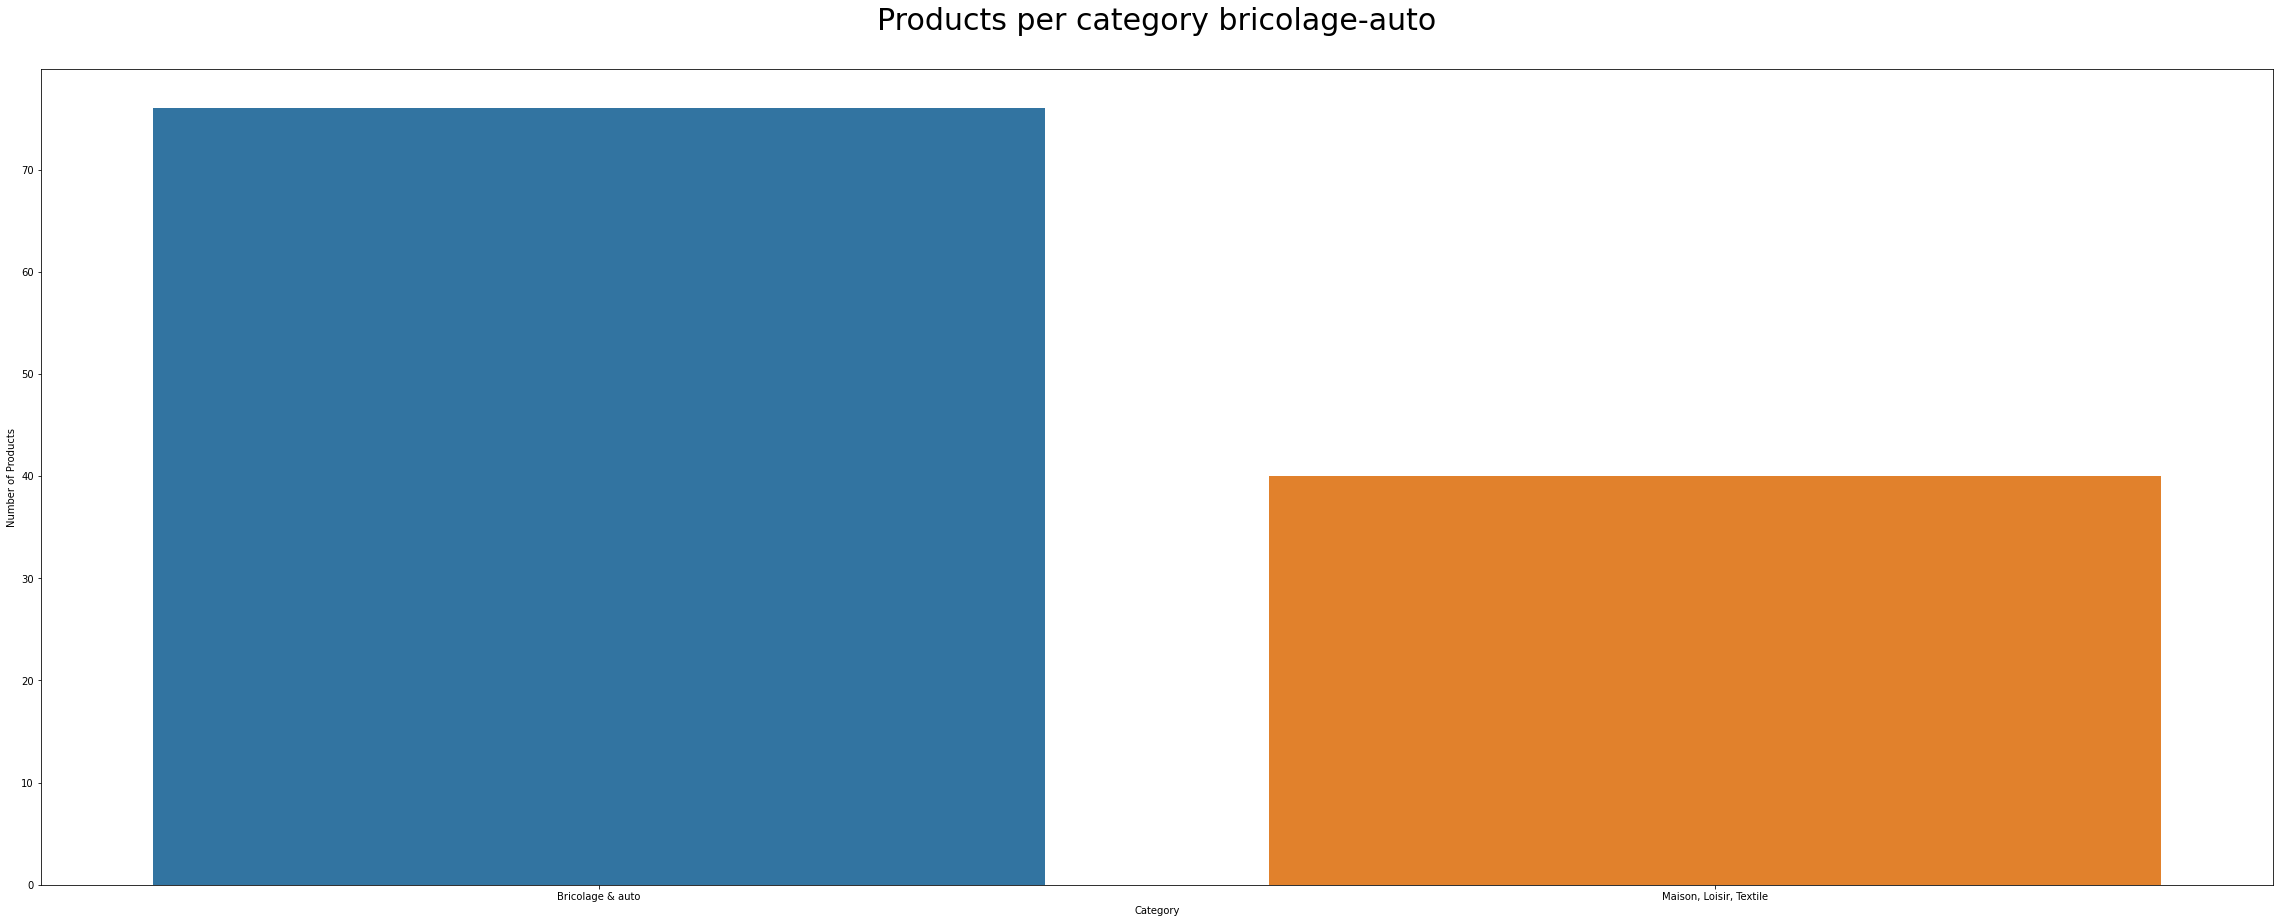

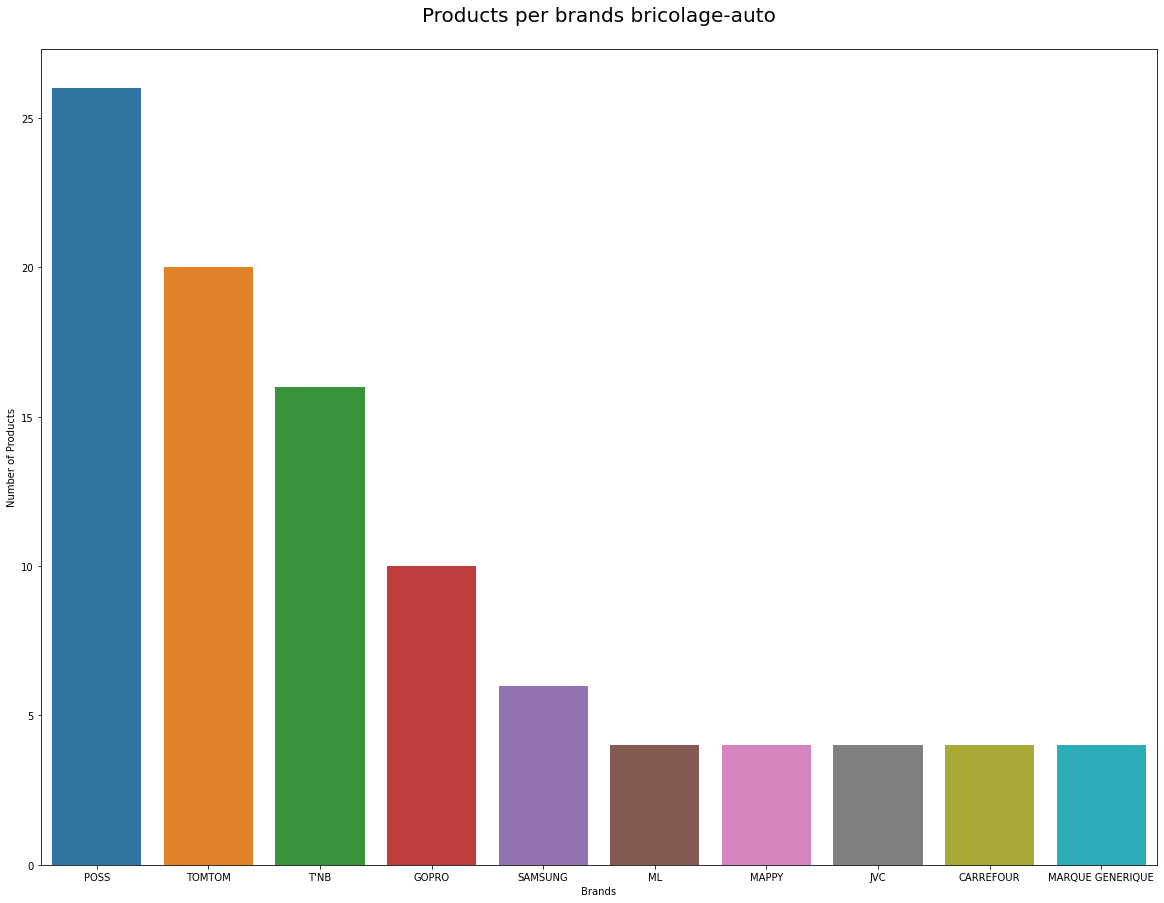

In [50]:
#Defining which category to scrap
def cat_name():
    print(r"""The categories are:
    - bio-et-ecologie
    - fruits-et-legumes
    - viandes-et-poissons
    - pains-et-patisseries
    - cremerie
    - traiteur
    - surgeles
    - epicerie-salee
    - epicerie-sucree
    - hygiene-et-beaute
    - boissons-sans-alcool
    - alcools-et-produits-aperitifs
    - hygiene-et-beaute
    - entretien-et-nettoyage
    - animaux
    - le-monde-de-bebe
    - jardin-outdoor
    - maison-interieur
    - cuisine-et-arts-de-la-table
    - electromenager
    - bricolage-auto
    - beaute-entretien-et-proprete
    - bagagerie-sport-et-loisirs
    - telephonie-et-objets-connectes
    - image-et-son
    - informatique-bureau
    - culture-et-jeux-videos
    - jeux-et-jouets
    """)
    list_cat=['bio-et-ecologie','fruits-et-legumes','viandes-et-poissons', 'pains-et-patisseries','cremerie','traiteur','surgeles','epicerie-salee','epicerie-sucree','hygiene-et-beaute','boissons-sans-alcool','alcools-et-produits-aperitifs','hygiene-et-beaute','entretien-et-nettoyage','animaux','le-monde-de-bebe','jardin-outdoor','maison-interieur','cuisine-et-arts-de-la-table','electromenager','bricolage-auto','beaute-entretien-et-proprete','bagagerie-sport-et-loisirs','telephonie-et-objets-connectes','image-et-son','informatique-bureau','culture-et-jeux-videos','jeux-et-jouets']
    while True:
        cat_name=input('What category would you like to scrap? ',)
        if cat_name in list_cat:
            break
    return cat_name



#Finding how many pages need to be scrapped
def pages_number(cat_name):
    url=f"https://www.carrefour.fr/r/{cat_name}?noRedirect=1&page=0"
    html = r.get(url).content;
    soup = BeautifulSoup(html)
    # i = number of products promoted
    number=[i.text.replace('\n','') for i in soup.select('h5')]
    i=int(number[0].split()[0])
    # checking number of product per page
    product_name=[i.text.replace('\n','') for i in soup.select('ul h2')]
    # n = number of pages of promo
    n=math.ceil(i/len(product_name))
    return n

#Scrapping pages
def scrapping():
    df_final=pd.DataFrame()
    for i in range(n+1):
        url=f'https://www.carrefour.fr/r/{cat_name}?noRedirect=1&page={i}'
        headers=f"""accept: application/json, text/plain, */*
        accept-encoding: gzip, deflate, br
        accept-language: fr-FR,fr;q=0.9,en-US;q=0.8,en;q=0.7
        cache-control: no-cache
        cookie: TCPID=119551614271772534656; _ga=GA1.2.1334375845.1556892869; cookieIDCrfOne=V12019531614280.2021166067845266; TC_OPTOUT=0@@@@@@ALL; already_visitedOne=1; visid_incap_1982952=0RjOMFJXRuKKO5znr4FgKeRMzFwAAAAAQUIPAAAAAAD6n2mvQU/sqwDmJkARHJBk; tc_cj_v2=m_iZZZ%22**%22%27%20ZZZKOOPRSLRPQNRRZZZ%5D777_rn_lh%5BfyfcheZZZ222H.*-/%24-%7B+%7B-%24.H%7D*%28ZZZKOOQLKRRRQLLMZZZ%5D777m_iZZZ%22**%22%27%20ZZZKOQRKMKMSQNRKZZZ%5D; datadome=MV~uTOOCnVIzfg.ULn2qjQwiYrYCKiCPqVlIXhkojIZNBB1zJzAjb_LCHT2CCYufdPeKF5Omu7~Z9jwshB52Hgn-fgLks.1wkrj4LccckQ; _cs_c=0; _cs_id=9566bfd8-1a78-a240-f0bb-e8015b3551ba.1556892869.3.1578131399.1578131399.1.1591056869072; visid_incap_441619=vrnUei+7RLiL2Xr3UUmTzfgij14AAAAAQUIPAAAAAABOtZUZlXTnCzjXe1PMdHUQ; visid_incap_1722501=z8YspOTjRLmNxY1jMdqc2voij14AAAAAQUIPAAAAAAAz5k9o0TPe5INp8+VLBGMZ; FRONTONE_USER=1589030911; FRONTONE_SESSID=b63750e3dfbafa4034d6cf3e8d2d558c; FRONTONE_SESSION_ID=e63380316c097c37050207ec718741fff9259edc; nlbi_441619=hPsnDNGFBgcuMoocJv8P3AAAAADvRtLIitBw0DCDaulsolSv; incap_ses_766_441619=xOrCJJ75ZFMuHdRpFmKhCqARk14AAAAAAbkGgZaI3ZwKzWSE9YLNdw==; incap_ses_766_1722501=V7G5dFZNVT+iJNRpFmKhCrsRk14AAAAAXCoyqmHLrIAbZR4ql84New==; QueueITAccepted-SDFrts345E-V3_prodevent=EventId%3Dprodevent%26QueueId%3D353322c4-4a85-4736-95aa-c51441010113%26RedirectType%3Dsafetynet%26IssueTime%3D1586696637%26Hash%3Df43739e176b3b7aaa718bb08ec22f99ce1e1414fc95bb20a6472efd106b12563; visid_incap_2237321=MIUgPDc1SUulJogUgHnXuewRk14AAAAAQUIPAAAAAACC1NtTLjWHs8UOS/4WjTEn; incap_ses_766_2237321=r+MCOZqfWyiAMtRpFmKhCuwRk14AAAAA3H8Vhks4p1T4AV7SEIzY0A==; ABTasty=uid%3D20041215043664510%26fst%3D1586696676950%26pst%3Dnull%26cst%3D1586696676950%26ns%3D1%26pvt%3D18%26pvis%3D18%26th%3D562227.699323.18.18.1.1.1586696677071.1586696730088.1_573142.710608.17.17.1.1.1586696677090.1586696730101.1_575385.713246.17.17.1.1.1586696677179.1586696730128.1; ab-popin_solutions=1; ABTastySession=sen%3D110__referrer%3Dhttps%3A//www.carrefour.fr/r%3Ffilters%255Bproduct.categories.name%255D%255B0%255D%3DEntretien%2520et%2520nettoyage%26noRedirect%3D0__landingPage%3Dhttps%3A//www.carrefour.fr/r/alcools-et-produits-aperitifs__referrerSent%3Dtrue; ADRUM=s=1586696878563&r=https%3A%2F%2Fwww.carrefour.fr%2Fboutique%2Fparapharmacie%3F0; pageCounterCrfOne=46
        dnt: 1
        pragma: no-cache
        referer: https://www.carrefour.fr/r/{cat_name}?noRedirect=1&page={i}
        sec-fetch-dest: empty
        sec-fetch-mode: cors
        sec-fetch-site: same-origin
        user-agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.163 Safari/537.36
        x-requested-with: XMLHttpRequest"""
        headers=dict([i.strip().split(': ') for i in headers.split('\n')])
        results=r.get(url, headers=headers).json()
        df=pd.json_normalize(results['data'])
        df1 = df[['attributes.ean','attributes.title', 'attributes.brand',  'attributes.categories','attributes.availability.purchasable', 'attributes.price.price', 'attributes.price.perUnitLabel']]
        df_final=df_final.append(df1)
        time.sleep(4)
        print(i)
    return df_final
    
def resetting_index(df_final):
    df_final=df_final.reset_index() 
    df_final.rename(columns={"index":"old_index"})
    return df_final

#cleaning data
def clean_cat(df_final):

    categories=[]

    for k in df_final.index:
        if df_final['attributes.categories'][k] == None:
            df_final['attributes.categories'][k] = [{'id': 'NA',
      'slug': 'NA',
      'label': ' Not specified',
      'uri': 'NA'},
     {'id': 'NA',
      'slug': 'NA',
      'label': 'Not specified',
      'uri': 'NA'},
     {'id': 'NA',
      'slug': 'NA',
      'label': 'Not specified',
      'uri': 'NA'}]

        categories.append([i['label'] for i in df_final['attributes.categories'][k]])
        category=[i[0] for i in categories]
        subcategory=[i[1] for i in categories]
    df_final['category']=category
    df_final['subcategory']=subcategory
    df_final=df_final.drop(['attributes.categories'], axis=1)
    return df_final

#renaming col
def renaming_col(df_final):
    df_ok=df_final.rename(columns={"attributes.ean": "EAN", "attributes.title": "product_name", 'attributes.brand':'brand', 'attributes.availability.purchasable':'purchasable', 'attributes.price.perUnitLabel':'price_per_unit','attributes.price.price':'price'})
    df_ok=df_ok[['EAN', 'product_name', 'brand', 'category', 'subcategory', 'purchasable', 'price', 'price_per_unit']]
    return df_ok

# data analysis
def group_category(df_final):
    df_final.groupby('category').mean()
    df_group=df_final.groupby(['category','subcategory']).count()['EAN']
    df_group=pd.DataFrame(df_group).rename(columns={'EAN':'count_products'})
    return df_group

# save final df into a csv
def save_df():
    os.chdir('C:/Users/Camille/Documents/Ecole/Ironhack/Week 3/Web_Scrapping_project/Output')
    df_final.to_csv(f'Carrefour_products_{cat_name}.csv')
    
#creating graphs
    
def graph_subcat():
    df_category=pd.DataFrame(df_final.category.value_counts()).reset_index().rename(columns={'index':'Category', 'category':'Number of Products'})
    fig, ax = plt.subplots(figsize=(40,15))
    graph_subcat = sns.barplot(data=df_category, x='Category', y='Number of Products')
    plt.title('Products per category'+ f' {cat_name}'+'\n', fontsize=30)
    return graph_subcat

def graph_top_brands():
    brands=pd.DataFrame(df_final.brand.value_counts()).nlargest(10, 'brand').reset_index().rename(columns={'index':'Brands', 'brand':'Number of Products'})
    fig, ax = plt.subplots(figsize=(20,15))
    graph_brands = sns.barplot(data=brands, x='Brands', y='Number of Products')
    plt.title('Products per brands'+ f' {cat_name}'+ '\n', fontsize=20)    
    return graph_brands

#saving graphs

def save_viz(barchart,title):
    os.chdir('C:/Users/Camille/Documents/Ecole/Ironhack/Week 3/Web_Scrapping_project/Output')
    fig = barchart.get_figure()
    fig.savefig(title+ '.png')
    plt.show()

    
#calling functions
if __name__ == '__main__':
    cat_name=cat_name()
    n=pages_number(cat_name)
    df_final=scrapping()
    df_final=resetting_index(df_final)
    df_final=clean_cat(df_final)
    df_final=renaming_col(df_final)
    df_group=group_category(df_final)
    save_df()
    #graphs
    subcat=graph_subcat()
    top_brands=graph_top_brands()
    #saving graphs
    save_viz(subcat,f'Products per subcategory {cat_name}')
    save_viz(top_brands, f'Products per brands (Top 10)  {cat_name}')